In [ ]:
#import library
import pandas as pd #read data
import matplotlib.pyplot as plt #draw charts
import numpy as np #data processing
from sklearn.preprocessing import MinMaxScaler #Normalize data
from keras.callbacks import ModelCheckpoint #Save the best training
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
#Layers to build model
from keras.models import Sequential #input
from keras.layers import Bidirectional,LSTM #deep learning
from keras.layers import Dropout,SimpleRNN,BatchNormalization #avoid learning by heart
from keras.layers import GRU,Dense,LeakyReLU #output
from keras.optimizers import RMSprop,Adam
#Check the correctness of the model
from sklearn.metrics import r2_score #measure fitness
from sklearn.metrics import mean_absolute_error #do sai so tuyet doi trung binh
from sklearn.metrics import mean_absolute_percentage_error #do % sai so tuyet doi trung binh
from sklearn.metrics import mean_squared_error
import seaborn as sns

#DATA IN CN
**Link**: https://figshare.com/articles/dataset/A_water_quality_dataset_in_China/22584742?fbclid=IwY2xjawJN61lleHRuA2FlbQIxMAABHbZMJOD88NZsJl6D6jRDr6o2DSRhup68ovDBED9B252Gvz8mrJpKk-GRHg_aem_hAPtDCzNdbR9GL4_LX38zg

In [ ]:
path = 'https://drive.google.com/uc?id=1QROS6HCnXKe7OeI1Ikhsf0cywW2yWF-9&export=download'
df = pd.read_csv(path, low_memory=False)
df = df.drop(index=0)

In [ ]:
df['MonitoringDate'] = pd.to_datetime(df['MonitoringDate'])
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [ ]:
df

,MonitoringLocationIdentifier,LongitudeMeasure_WGS84,LatitudeMeasure_WGS84,MonitoringDate,IndicatorsName,Value,Unit,SourceProvider
1,1,80.666649,43.838487,2012-05-28,CODMn,2.90,mg/l,China National Environmental Monitoring Centre...
2,1,80.666649,43.838487,2012-05-28,DO,6.04,mg/l,China National Environmental Monitoring Centre...
3,1,80.666649,43.838487,2012-05-28,pH,7.90,pH,China National Environmental Monitoring Centre...
4,1,80.666649,43.838487,2012-06-04,NH4N,0.04,mg/l,China National Environmental Monitoring Centre...
5,1,80.666649,43.838487,2012-06-04,CODMn,2.70,mg/l,China National Environmental Monitoring Centre...
...,...,...,...,...,...,...,...,...
336288,2384,122.160000,30.400000,2020-07-01,pH,8.03,pH,National Marine Environmental Monitoring Cente...
336289,2384,122.160000,30.400000,2021-07-01,pH,8.06,pH,National Marine Environmental Monitoring Cente...
336290,2384,122.160000,30.400000,2020-04-01,pH,8.07,pH,National Marine Environmental Monitoring Cente...
336291,2384,122.160000,30.400000,2020-10-01,pH,8.07,pH,National Marine Environmental Monitoring Cente...


**Indicators statistics**

Number of locations in the dataset: 2384


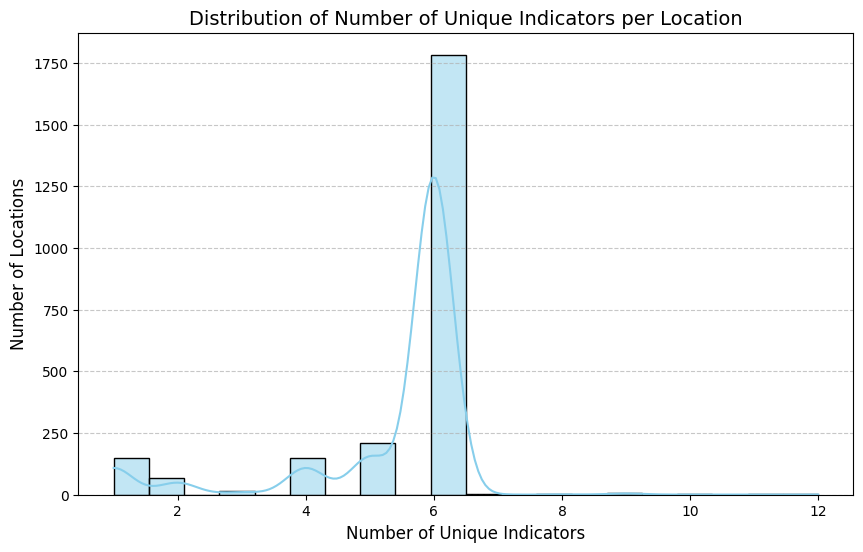


Top 10 Locations by Number of Unique Indicators:
                              Unique Indicators Count
MonitoringLocationIdentifier                         
205                                                12
188                                                11
185                                                10
215                                                 9
192                                                 9
191                                                 9
360                                                 9
195                                                 9
184                                                 9
187                                                 9
Location with most indicators: 205
Number of unique indicators: 12
Shape of it: (505, 8)
       MonitoringLocationIdentifier  LongitudeMeasure_WGS84  \
count                         505.0            5.050000e+02   
mean                          205.0            1.148289e+02   
min                     

In [ ]:
number_of_location = len(df['MonitoringLocationIdentifier'].unique())
print("Number of locations in the dataset:", number_of_location)
# Assuming your dataframe is named 'df'
# Group by MonitoringLocationIdentifier and count unique IndicatorsName
location_indicators = df.groupby('MonitoringLocationIdentifier')['IndicatorsName'].nunique()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(location_indicators, bins=20, kde=True, color='skyblue')

# Customize the plot
plt.title('Distribution of Number of Unique Indicators per Location', fontsize=14)
plt.xlabel('Number of Unique Indicators', fontsize=12)
plt.ylabel('Number of Locations', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Top 10
top_locations = location_indicators.sort_values(ascending=False).head(10)
print("\nTop 10 Locations by Number of Unique Indicators:")
print(top_locations.to_frame(name="Unique Indicators Count"))


# Find the location with the maximum number of unique indicators
max_indicators_location = location_indicators.idxmax()
max_indicators_count = location_indicators.max()

most_indicators_location_df = df[df['MonitoringLocationIdentifier'] == max_indicators_location]
# Get the details of that location (longitude and latitude)
location_details = most_indicators_location_df[
    ['MonitoringLocationIdentifier', 'LongitudeMeasure_WGS84', 'LatitudeMeasure_WGS84']
].drop_duplicates()


# Get the list of unique indicators at that location
unique_indicators = most_indicators_location_df[
    'IndicatorsName'
].unique()

print(f"Location with most indicators: {max_indicators_location}")
print(f"Number of unique indicators: {max_indicators_count}")
print(f"Shape of it:", most_indicators_location_df.shape)
print(most_indicators_location_df.describe())
print("\nLocation details:")
print(location_details)
print("\nUnique indicators at this location:")
print(unique_indicators)

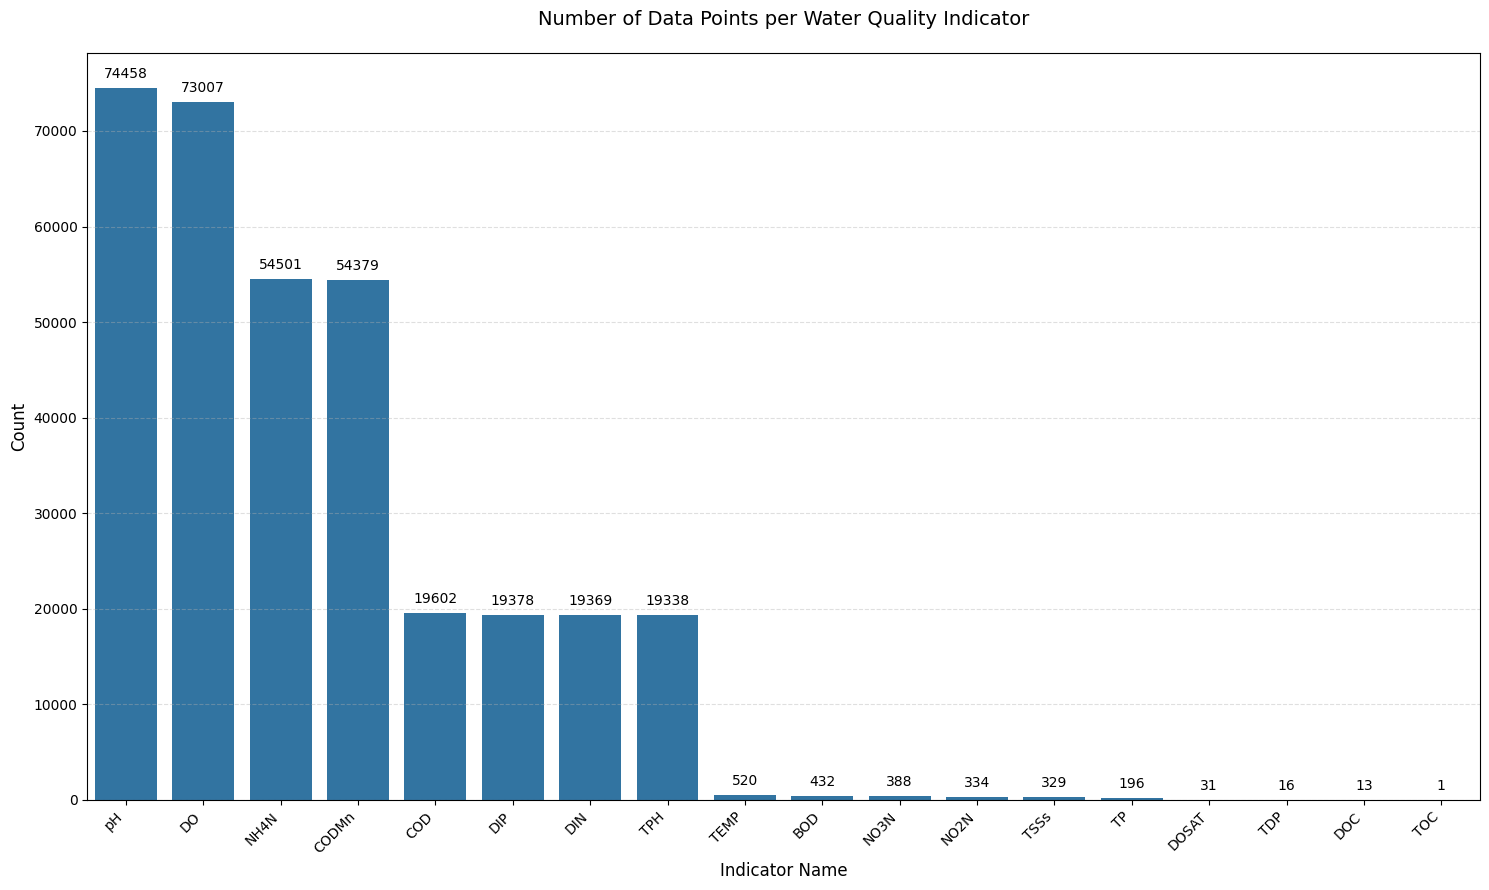

Data Points per Indicator:
IndicatorsName
pH       74458
DO       73007
NH4N     54501
CODMn    54379
COD      19602
DIP      19378
DIN      19369
TPH      19338
TEMP       520
BOD        432
NO3N       388
NO2N       334
TSSs       329
TP         196
DOSAT       31
TDP         16
DOC         13
TOC          1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of data points per indicator
indicator_counts = df['IndicatorsName'].value_counts()

# Create a bar plot to visualize the counts
plt.figure(figsize=(15, 9))
ax = sns.barplot(x=indicator_counts.index, y=indicator_counts.values)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Customize the plot
plt.title('Number of Data Points per Water Quality Indicator', fontsize=14, pad=20)
plt.xlabel('Indicator Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show the plot
plt.tight_layout()
plt.show()

# Print the raw counts as a table
print("Data Points per Indicator:")
print(indicator_counts.to_string())

**Most data point location**

In [ ]:
most_occurred_count = df['MonitoringLocationIdentifier'].value_counts().idxmax()
print (most_occurred_count)
most_occurred_count_filtered_df = df[df['MonitoringLocationIdentifier'] == most_occurred_count]
most_occurred_count_filtered_df.sort_values(by='MonitoringDate')

132


,MonitoringLocationIdentifier,LongitudeMeasure_WGS84,LatitudeMeasure_WGS84,MonitoringDate,IndicatorsName,Value,Unit,SourceProvider
191986,132,118.142558,34.599912,2007-10-29,NH4N,0.20,mg/l,China National Environmental Monitoring Centre...
191987,132,118.142558,34.599912,2007-10-29,CODMn,3.90,mg/l,China National Environmental Monitoring Centre...
191988,132,118.142558,34.599912,2007-10-29,pH,8.50,pH,China National Environmental Monitoring Centre...
191989,132,118.142558,34.599912,2007-10-29,DO,9.79,mg/l,China National Environmental Monitoring Centre...
191990,132,118.142558,34.599912,2007-11-05,NH4N,0.03,mg/l,China National Environmental Monitoring Centre...
...,...,...,...,...,...,...,...,...
193812,132,118.142558,34.599912,2018-12-17,pH,7.50,pH,China National Environmental Monitoring Centre...
193815,132,118.142558,34.599912,2018-12-24,CODMn,4.20,mg/l,China National Environmental Monitoring Centre...
193816,132,118.142558,34.599912,2018-12-24,pH,8.20,pH,China National Environmental Monitoring Centre...
193814,132,118.142558,34.599912,2018-12-24,NH4N,0.10,mg/l,China National Environmental Monitoring Centre...


In [ ]:
distinct_values = most_occurred_count_filtered_df['IndicatorsName'].unique()
print(distinct_values)

['NH4N' 'CODMn' 'pH' 'DO']


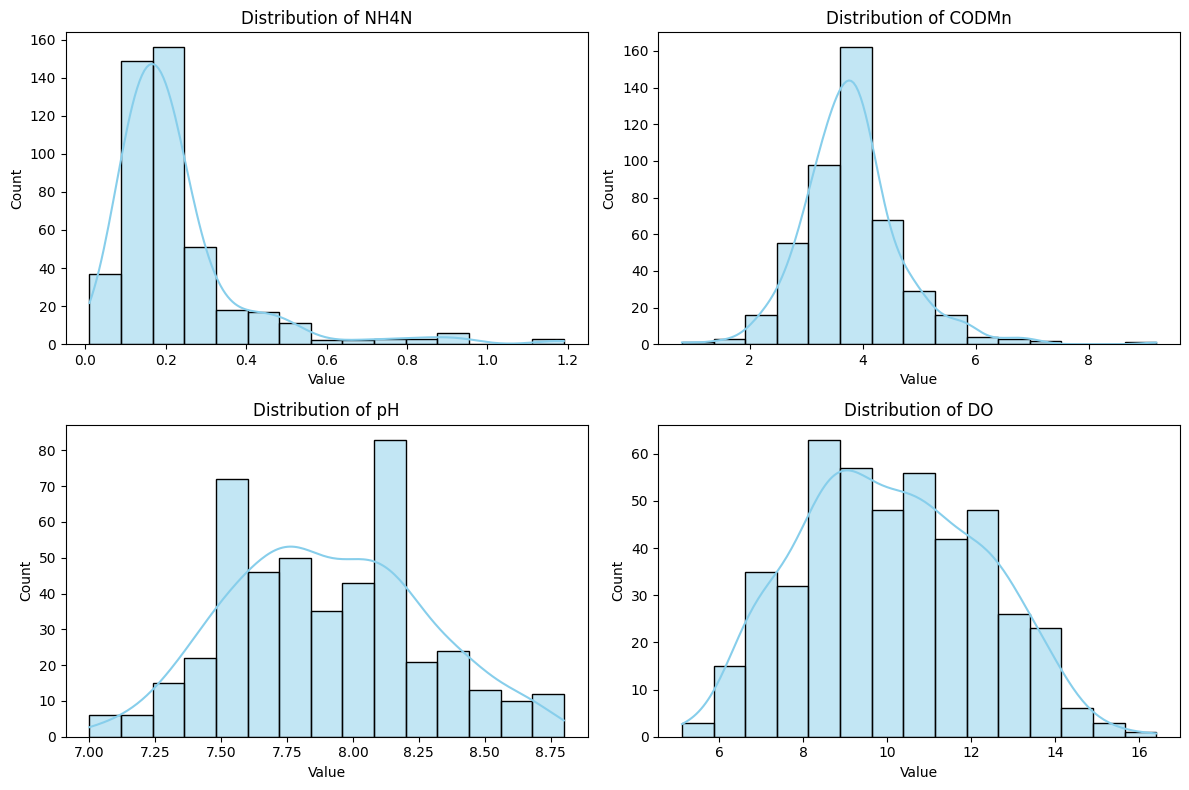

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for i, indicator in enumerate(distinct_values, 1):
    plt.subplot(2, 2, i)
    sns.histplot(most_occurred_count_filtered_df[most_occurred_count_filtered_df['IndicatorsName'] == indicator]['Value'], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {indicator}')
    plt.xlabel('Value')
plt.tight_layout()
plt.show()

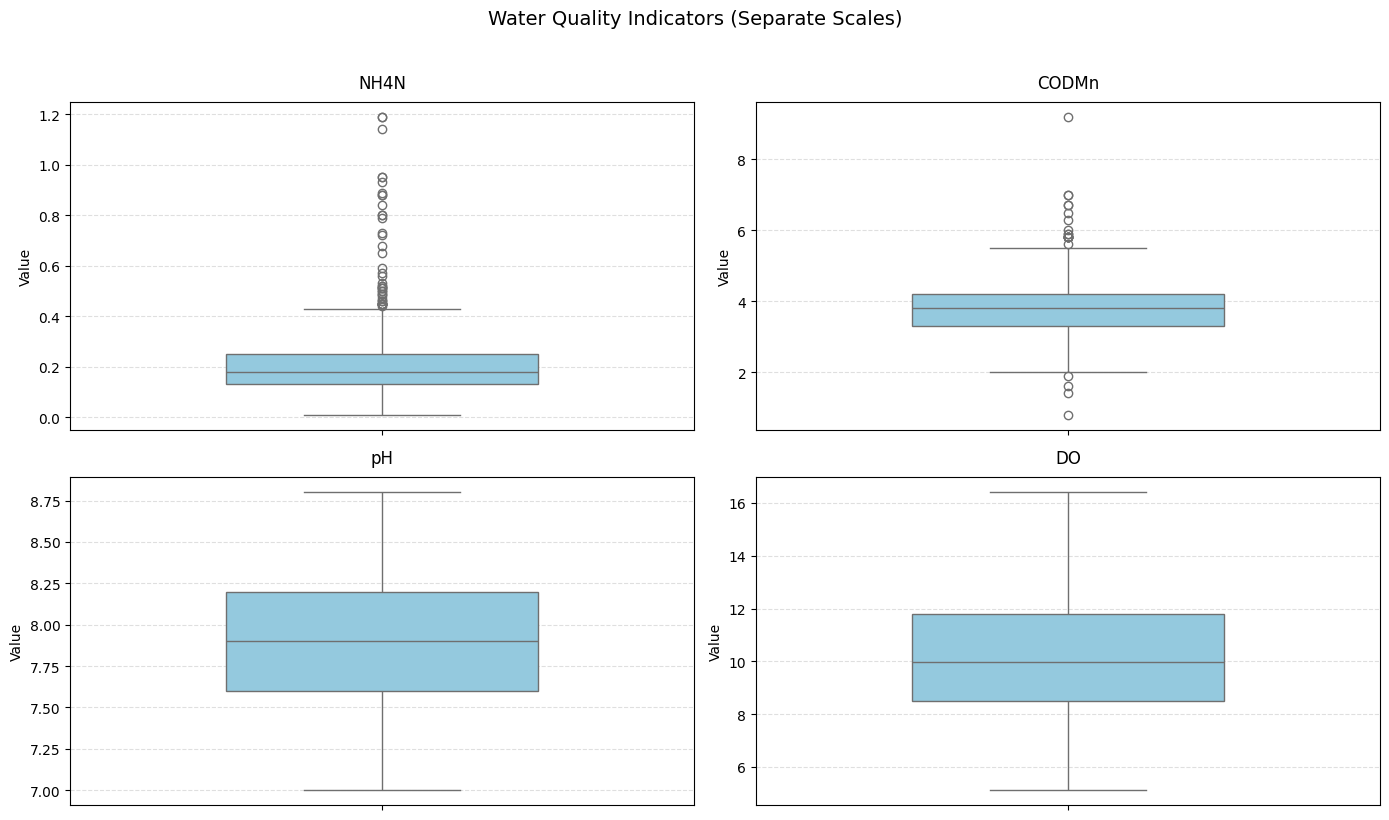

In [ ]:
# Set up the figure and subplots
plt.figure(figsize=(14, 8))

# Create one subplot per indicator
for i, indicator in enumerate(distinct_values, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns of plots

    # Filter data for the current indicator
    subset = most_occurred_count_filtered_df[most_occurred_count_filtered_df['IndicatorsName'] == indicator]

    # Create the boxplot
    sns.boxplot(data=subset, y='Value', color='skyblue', width=0.5)

    # Customize the subplot
    plt.title(f'{indicator}', fontsize=12, pad=10)
    plt.ylabel('Value', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.4)

# Adjust layout and show
plt.suptitle('Water Quality Indicators (Separate Scales)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

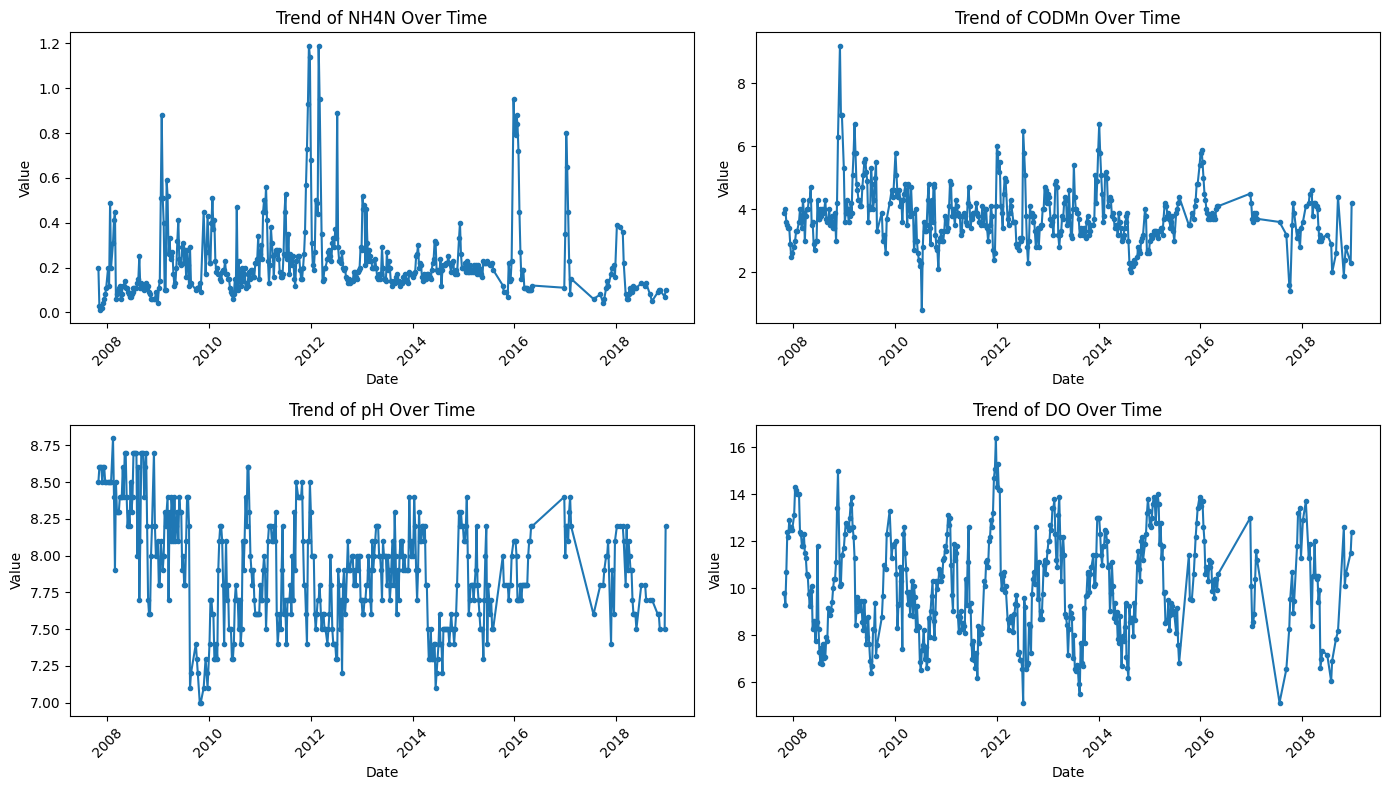

In [ ]:
plt.figure(figsize=(14, 8))
for i, indicator in enumerate(['NH4N', 'CODMn', 'pH', 'DO'], 1):
    plt.subplot(2, 2, i)
    subset = most_occurred_count_filtered_df[most_occurred_count_filtered_df['IndicatorsName'] == indicator]
    subset = subset.sort_values('MonitoringDate')  # Ensure chronological order
    plt.plot(subset['MonitoringDate'], subset['Value'], marker='o', linestyle='-', markersize=3)
    plt.title(f'Trend of {indicator} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

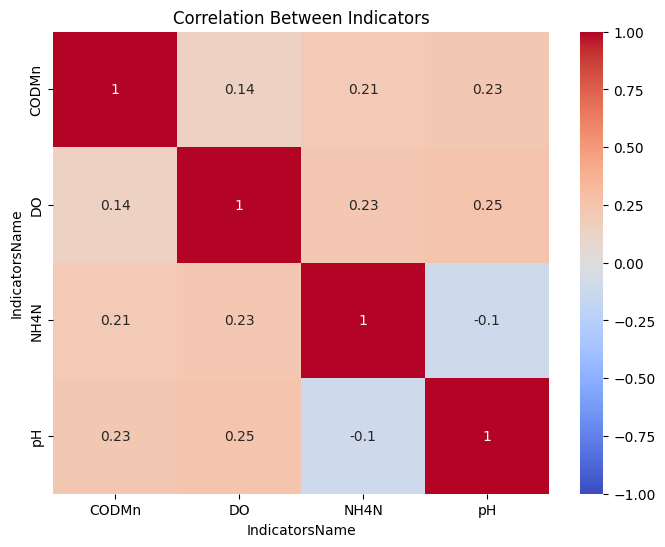

In [ ]:
# Pivot to get indicators as columns
pivoted_df = most_occurred_count_filtered_df.pivot(index='MonitoringDate', columns='IndicatorsName', values='Value')

plt.figure(figsize=(8, 6))
sns.heatmap(pivoted_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Indicators')
plt.show()

#DATA OF CAMBRIDGESHIRE AND BEDFORDSHIRE (FROM UK GOV)
**Link**: https://environment.data.gov.uk/water-quality/view/download

In [ ]:
import pandas as pd
import gdown

# Google Drive file ID extracted from the link
file_id = "1ChWh3Xfw-atTF_Vnj10UBbm_DnHQDT59"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
csv_file = "data.csv"
gdown.download(download_url, csv_file, quiet=False)

# Read CSV file correctly
df = pd.read_csv(csv_file, low_memory=False)

# Reset index to ensure it's correct
df = df.reset_index(drop=True)

# Drop the first row if it exists
if 0 in df.index:
    df = df.drop(index=0)

# Display first few rows
print(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1ChWh3Xfw-atTF_Vnj10UBbm_DnHQDT59
From (redirected): https://drive.google.com/uc?id=1ChWh3Xfw-atTF_Vnj10UBbm_DnHQDT59&confirm=t&uuid=b5597f5c-df51-4a18-9902-1ab25a0a5d54
To: /content/data.csv
100%|██████████| 733M/733M [00:11<00:00, 63.0MB/s]


                                                 @id  \
1  http://environment.data.gov.uk/water-quality/d...   
2  http://environment.data.gov.uk/water-quality/d...   
3  http://environment.data.gov.uk/water-quality/d...   
4  http://environment.data.gov.uk/water-quality/d...   
5  http://environment.data.gov.uk/water-quality/d...   

                                sample.samplingPoint  \
1  http://environment.data.gov.uk/water-quality/i...   
2  http://environment.data.gov.uk/water-quality/i...   
3  http://environment.data.gov.uk/water-quality/i...   
4  http://environment.data.gov.uk/water-quality/i...   
5  http://environment.data.gov.uk/water-quality/i...   

  sample.samplingPoint.notation       sample.samplingPoint.label  \
1                     AN-011489  RED HOUSE NURSING HOME SYRESHAM   
2                     AN-011489  RED HOUSE NURSING HOME SYRESHAM   
3                     AN-011489  RED HOUSE NURSING HOME SYRESHAM   
4                     AN-011489  RED HOUSE NURSING HOM

In [ ]:
number_of_location = len(df['sample.samplingPoint.notation'].unique())
print("Number of locations in the dataset:", number_of_location)

Number of locations in the dataset: 1713


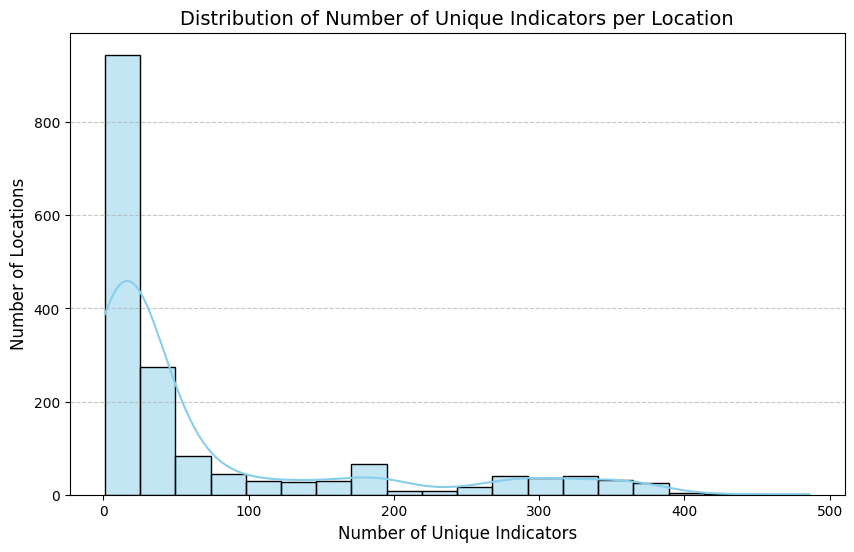


Top 10 Locations by Number of Unique Indicators:
                               Unique Indicators Count
sample.samplingPoint.notation                         
AN-26M31                                           486
AN-MISCTL44                                        466
AN-51M01                                           442
AN-MISCTL13                                        420
AN-TF90011C                                        395
AN-TL44299C                                        391
AN-TL34206C                                        389
AN-TL99143C                                        387
AN-TL86179C                                        383
AN-TL25059S                                        383
Location with most indicators: AN-26M31
Number of unique indicators: 486
Shape of it: (26667, 17)
       determinand.notation         result  \
count          26667.000000   26667.000000   
mean            3700.790303      55.170557   
std             3580.840787    1127.797376   
min     

In [ ]:
import seaborn as sns
location_indicators = df.groupby('sample.samplingPoint.notation')['determinand.label'].nunique()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(location_indicators, bins=20, kde=True, color='skyblue')

# Customize the plot
plt.title('Distribution of Number of Unique Indicators per Location', fontsize=14)
plt.xlabel('Number of Unique Indicators', fontsize=12)
plt.ylabel('Number of Locations', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Top 10
top_locations = location_indicators.sort_values(ascending=False).head(10)
print("\nTop 10 Locations by Number of Unique Indicators:")
print(top_locations.to_frame(name="Unique Indicators Count"))

# Find the location with the maximum number of unique indicators
max_indicators_location = location_indicators.idxmax()
max_indicators_count = location_indicators.max()

most_indicators_location_df = df[df['sample.samplingPoint.notation'] == max_indicators_location]
# Get the details of that location (longitude and latitude)
location_details = most_indicators_location_df[
    ['sample.samplingPoint.notation', 'sample.samplingPoint.label']
].drop_duplicates()


# Get the list of unique indicators at that location
unique_indicators = most_indicators_location_df[
    'determinand.label'
].unique()

print(f"Location with most indicators: {max_indicators_location}")
print(f"Number of unique indicators: {max_indicators_count}")
print(f"Shape of it:", most_indicators_location_df.shape)
print(most_indicators_location_df.describe())
print("\nLocation details:")
print(location_details)
print("\nUnique indicators at this location:")
print(unique_indicators)

There are too much kind of indicators for all of those so we try to take the same as one we choose in CN dataset

Number of data points per indicator:
-----------------------------------
Ammonia(N)          73,653
pH                  66,496
Nitrite-N           54,150
COD as O2           14,732
-----------------------------------
TOTAL              209,031


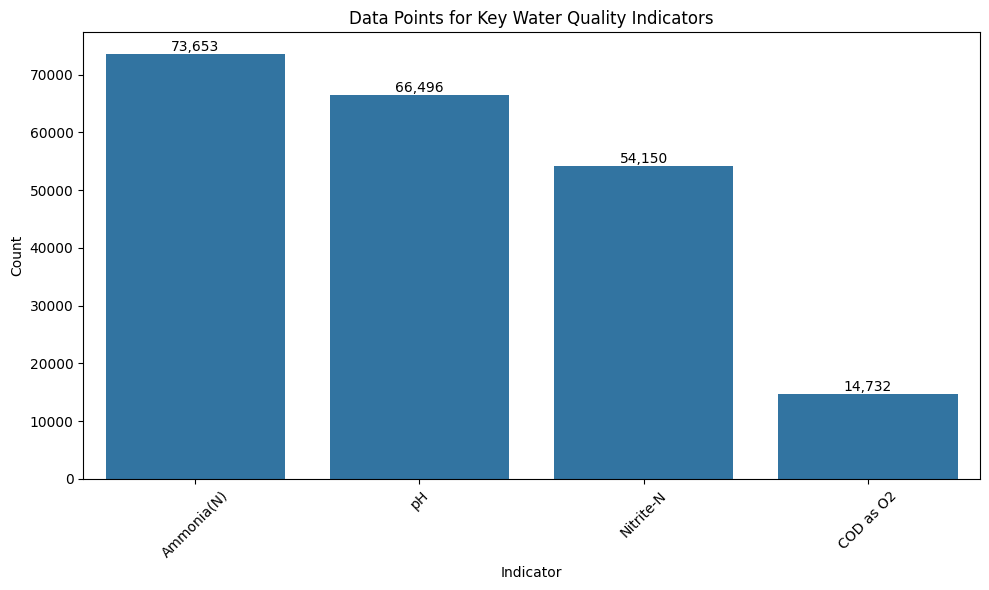

In [ ]:
# Define the indicators we want to analyze
target_indicators = ['pH', 'Nitrite-N', 'COD as O2', 'Ammonia(N)']

# Filter the dataframe to only include our target indicators
filtered_df = df[df['determinand.label'].isin(target_indicators)]

# Count the number of data points for each indicator
indicator_counts = filtered_df['determinand.label'].value_counts()

# Print the results in a clean format
print("Number of data points per indicator:")
print("-----------------------------------")
for indicator, count in indicator_counts.items():
    print(f"{indicator:<15} {count:>10,}")
print("-----------------------------------")
print(f"TOTAL{'':<10} {indicator_counts.sum():>10,}")

# Optional: Visualize with a bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=indicator_counts.index, y=indicator_counts.values)
plt.title('Data Points for Key Water Quality Indicators')
plt.xlabel('Indicator')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(indicator_counts.values):
    plt.text(i, v, f"{v:,}", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [ ]:
# 1. Filter for our target indicators
target_indicators = ['pH', 'Nitrite-N', 'COD as O2', 'Ammonia(N)']
filtered = df[df['determinand.label'].isin(target_indicators)].copy()

# 2. Convert sampleDateTime to datetime and split into date and time
filtered['sample.sampleDateTime'] = pd.to_datetime(filtered['sample.sampleDateTime'])
filtered['Date'] = filtered['sample.sampleDateTime'].dt.date
filtered['Time'] = filtered['sample.sampleDateTime'].dt.time

# 3. Pivot the table - One row per sample date and location, columns for each measurement
pivoted = filtered.pivot_table(
    index=['sample.samplingPoint.notation', 'Date'],
    columns='determinand.label',
    values='result',
    aggfunc='first'  # Take first result if duplicates exist
).reset_index()

# 4. Clean up column names
pivoted.columns.name = None  # Remove the 'determinand.label' label
pivoted = pivoted.rename(columns={
    'sample.samplingPoint.notation': 'LocationID'
})

# 5. Drop rows with any NA values
pivoted = pivoted.dropna()

# Show the pivoted data
print(pivoted.head())
print(f"\nTotal samples: {len(pivoted)}")
print(f"Columns: {list(pivoted.columns)}")

# Check how many unique locations remain
unique_locations = pivoted['LocationID'].nunique()
print(f"\nUnique locations remaining: {unique_locations}")
print("List of locations:")
print(pivoted['LocationID'].unique())

# Count number of data points per location
location_counts = pivoted['LocationID'].value_counts()

# Get the location with the most data points
most_common_location = location_counts.idxmax()
most_common_count = location_counts.max()

print(f"Location with most data points: {most_common_location} ({most_common_count} samples)")
print("\nCount of samples per location:")
print(location_counts)

best_location_data = pivoted[pivoted['LocationID'] == most_common_location]
start_date = best_location_data['Date'].min()
end_date = best_location_data['Date'].max()

print(f"\nTime coverage for {most_common_location}:")
print(f"From: {start_date}")
print(f"To: {end_date}")

     LocationID        Date  Ammonia(N)  COD as O2  Nitrite-N    pH
5934   AN-05M03  2003-05-01       0.041       21.0     0.0429  8.27
5935   AN-05M03  2003-06-04       0.063       30.0     0.0401  8.12
5936   AN-05M03  2003-07-07       0.030       15.0     0.0251  8.64
5937   AN-05M03  2003-08-06       0.066       15.0     0.0302  8.30
5938   AN-05M03  2003-09-01       0.034       12.0     0.0186  8.05

Total samples: 8864
Columns: ['LocationID', 'Date', 'Ammonia(N)', 'COD as O2', 'Nitrite-N', 'pH']

Unique locations remaining: 161
List of locations:
['AN-05M03' 'AN-10M01' 'AN-11M02' 'AN-11M03' 'AN-11M04' 'AN-11M06'
 'AN-11M09' 'AN-11M12' 'AN-11M14' 'AN-11M19' 'AN-12M03' 'AN-12M05'
 'AN-12M08' 'AN-14M05' 'AN-14M07' 'AN-15M01' 'AN-15M05' 'AN-19M01'
 'AN-19M04' 'AN-19M07' 'AN-20M03' 'AN-22M01' 'AN-22M02' 'AN-22M18A'
 'AN-26M02' 'AN-26M03' 'AN-26M06' 'AN-26M31' 'AN-26M32' 'AN-26M34'
 'AN-26M48' 'AN-26M49' 'AN-26M51' 'AN-30M07' 'AN-30M19' 'AN-30M25'
 'AN-33M02' 'AN-33M06' 'AN-33M09' 'AN-

In [ ]:
best_location_data

,LocationID,Date,Ammonia(N),COD as O2,Nitrite-N,pH
23942,AN-26M31,2003-01-14,0.175,20.0,0.0707,7.90
23943,AN-26M31,2003-05-02,0.030,39.0,0.0850,8.58
23944,AN-26M31,2003-05-07,0.030,48.0,0.0939,9.02
23945,AN-26M31,2003-05-19,0.030,46.0,0.1170,9.15
23946,AN-26M31,2003-07-11,0.062,27.0,0.0649,8.14
...,...,...,...,...,...,...
24172,AN-26M31,2023-11-20,0.044,20.0,0.0560,8.09
24173,AN-26M31,2023-12-01,0.075,19.0,0.0770,8.14
24174,AN-26M31,2024-01-15,0.150,17.0,0.0930,8.07
24175,AN-26M31,2024-02-19,0.100,21.0,0.0620,7.98


In [ ]:
best_location_data.describe()

,Ammonia(N),COD as O2,Nitrite-N,pH
count,210.000000,210.00000,210.000000,210.000000
mean,0.069476,22.20000,0.060808,8.185238
std,0.044624,7.74399,0.023243,0.268877
min,0.030000,10.00000,0.004000,7.380000
25%,0.030000,17.00000,0.043850,8.030000
50%,0.059500,21.00000,0.059850,8.110000
75%,0.090000,25.00000,0.074225,8.285000
max,0.309000,49.00000,0.140000,9.150000


<ipython-input-9-2ddec2c30cbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


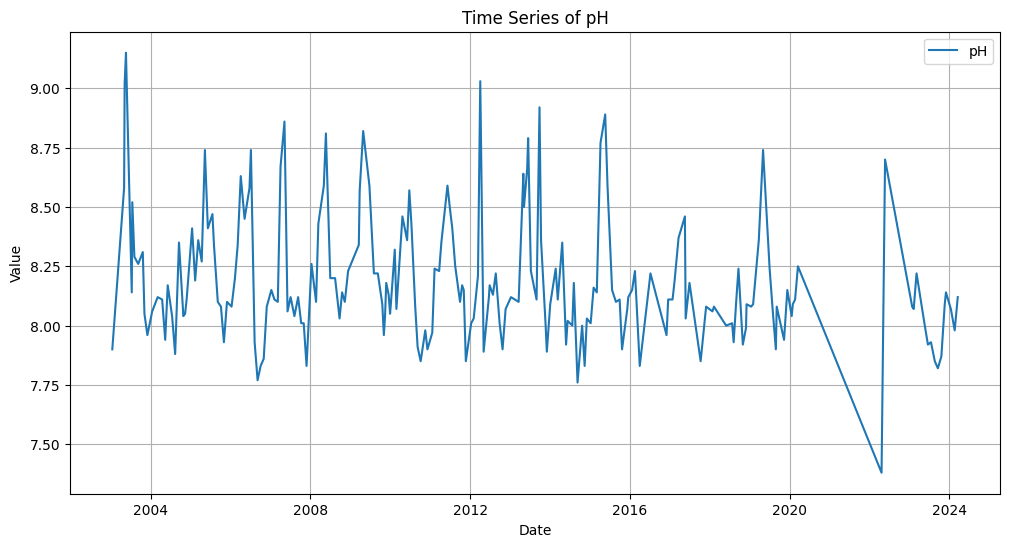

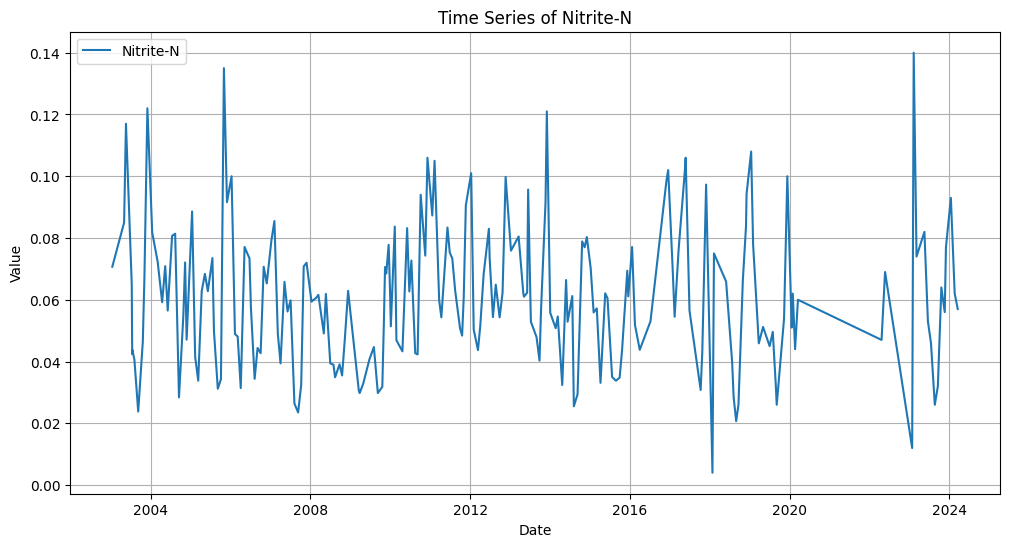

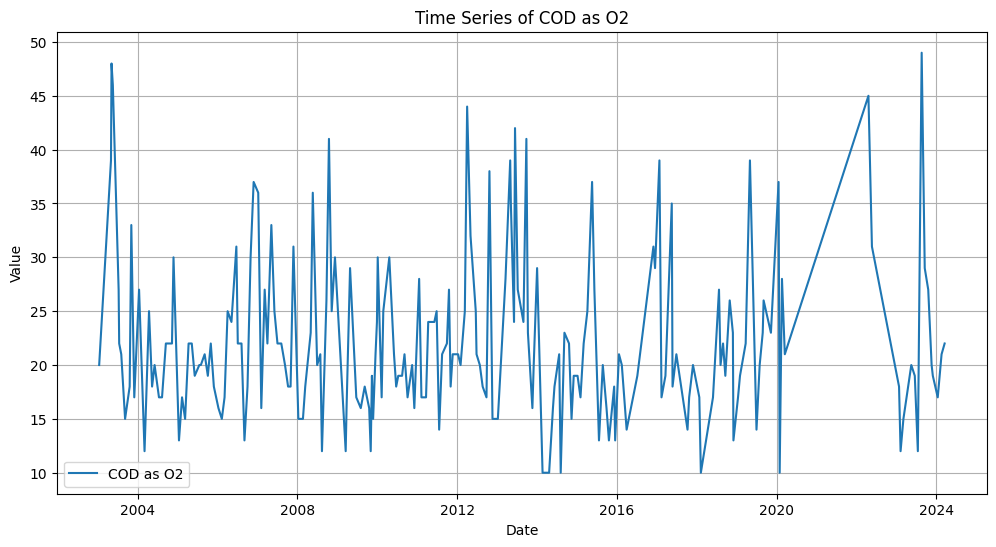

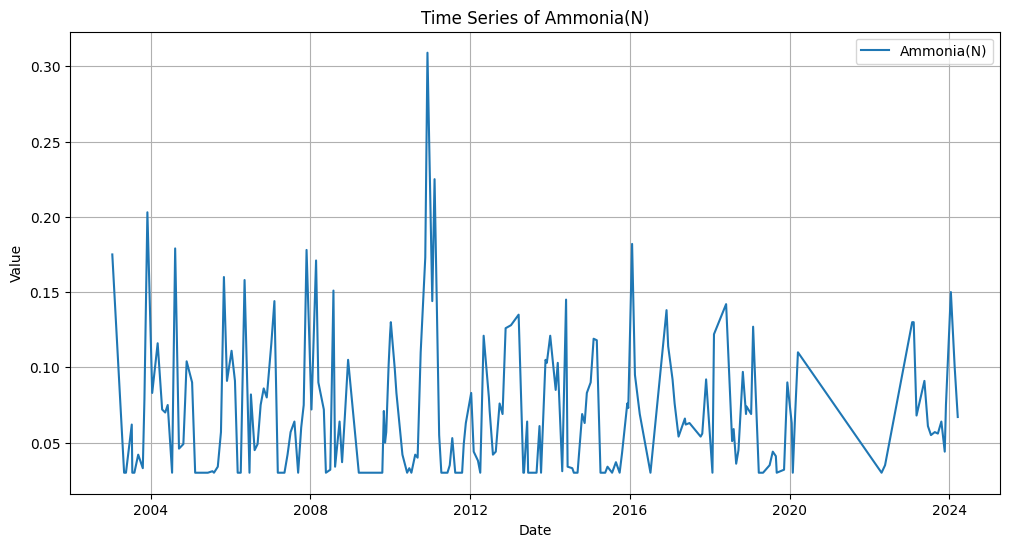

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = best_location_data
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

target_indicators = ['pH', 'Nitrite-N', 'COD as O2', 'Ammonia(N)']

for indicator in target_indicators:
    plt.figure(figsize=(12, 6))
    plt.plot(df["Date"], df[indicator], linestyle='-', label=indicator)

    # Formatting
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.title(f"Time Series of {indicator}")
    plt.legend()
    plt.grid(True)
    plt.show()

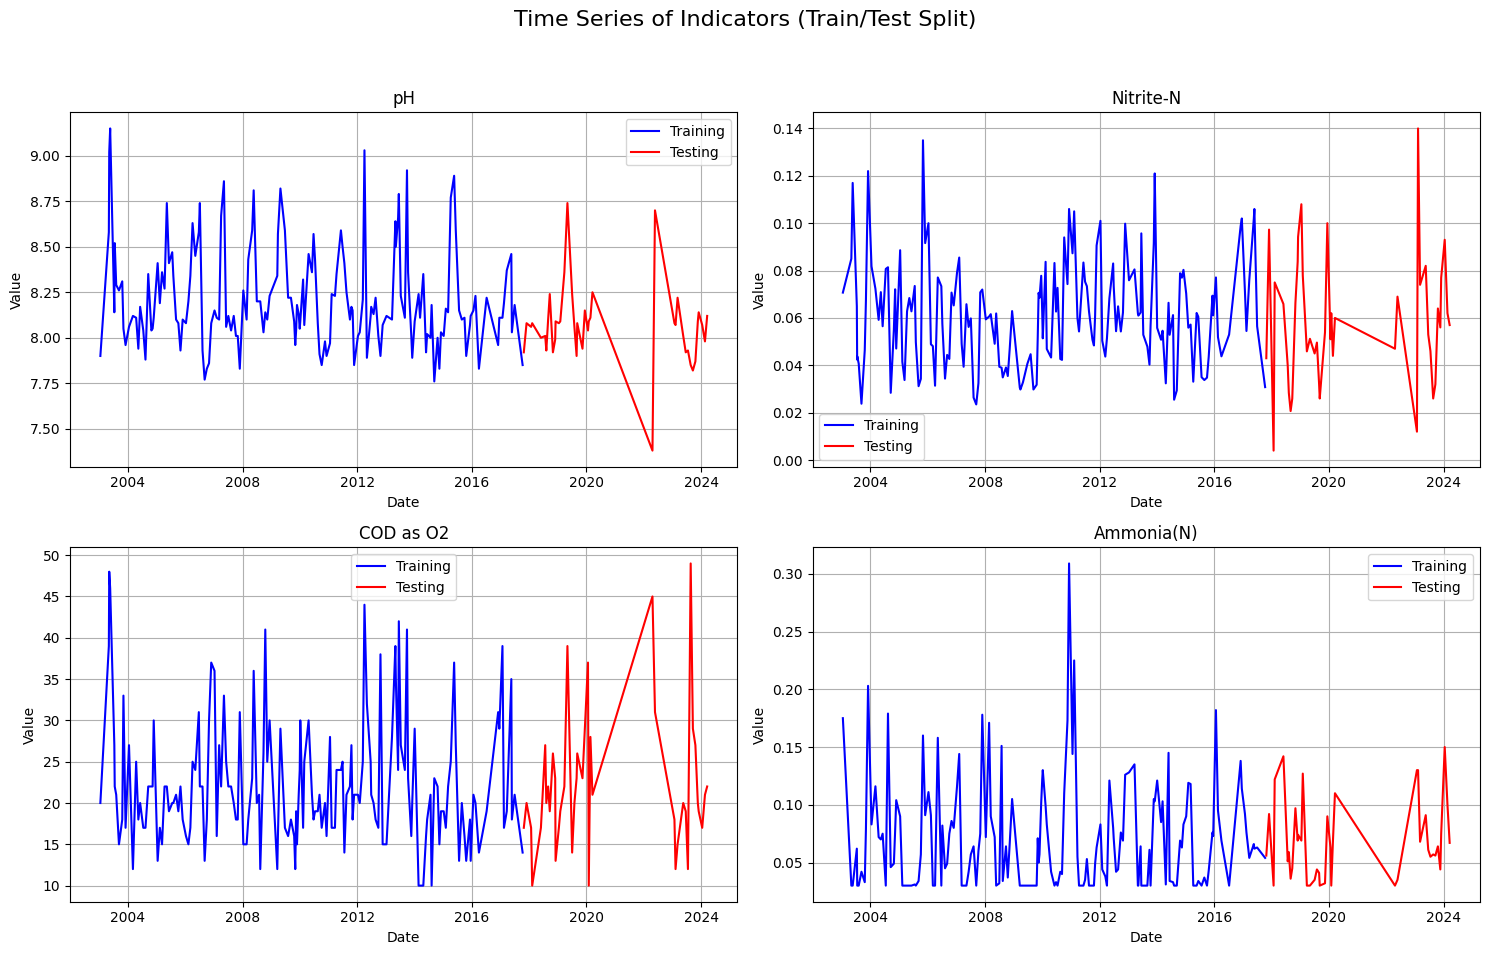

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = best_location_data.copy()
df["Date"] = pd.to_datetime(df["Date"])

target_indicators = ['pH', 'Nitrite-N', 'COD as O2', 'Ammonia(N)']

# Calculate the index for 80% split
split_index = int(len(df) * 0.8)

# Split the data
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Time Series of Indicators (Train/Test Split)", fontsize=16)

for ax, indicator in zip(axes.flatten(), target_indicators):
    # Plot training data in blue
    ax.plot(train_df["Date"], train_df[indicator], linestyle='-', color='blue', label='Training')

    # Plot testing data in red
    ax.plot(test_df["Date"], test_df[indicator], linestyle='-', color='red', label='Testing')

    # Formatting
    ax.set_title(indicator)
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


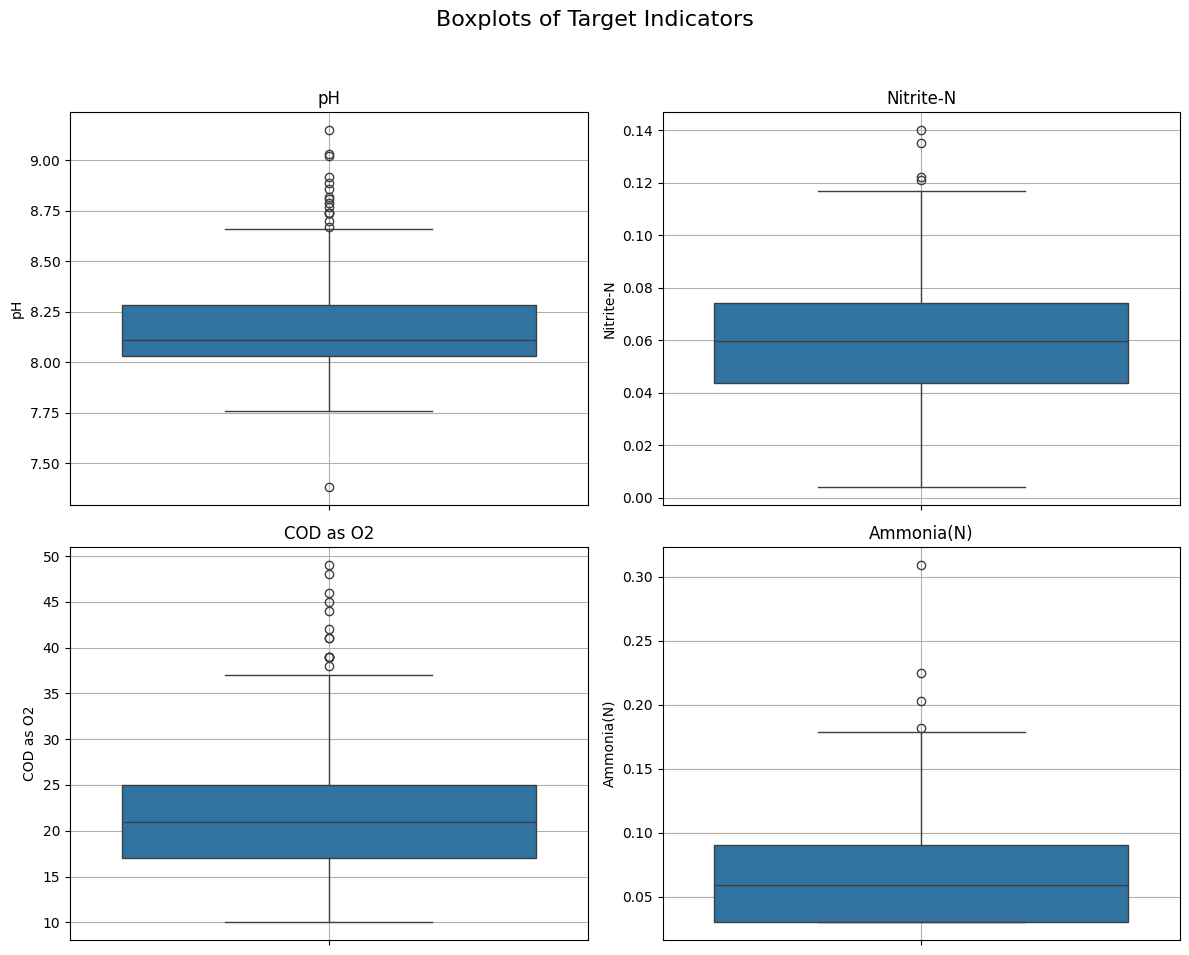

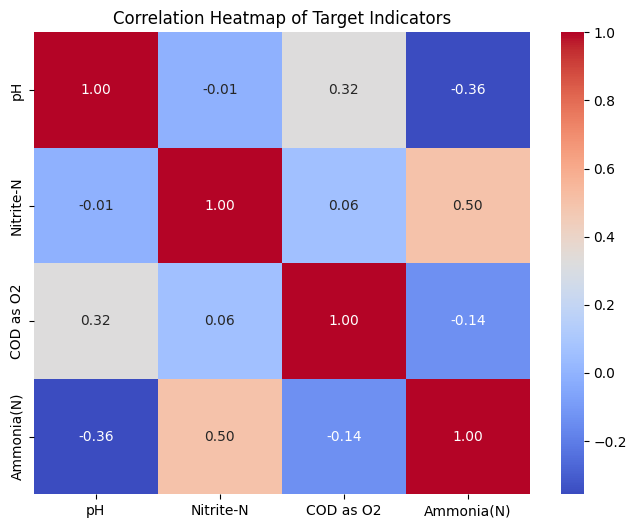

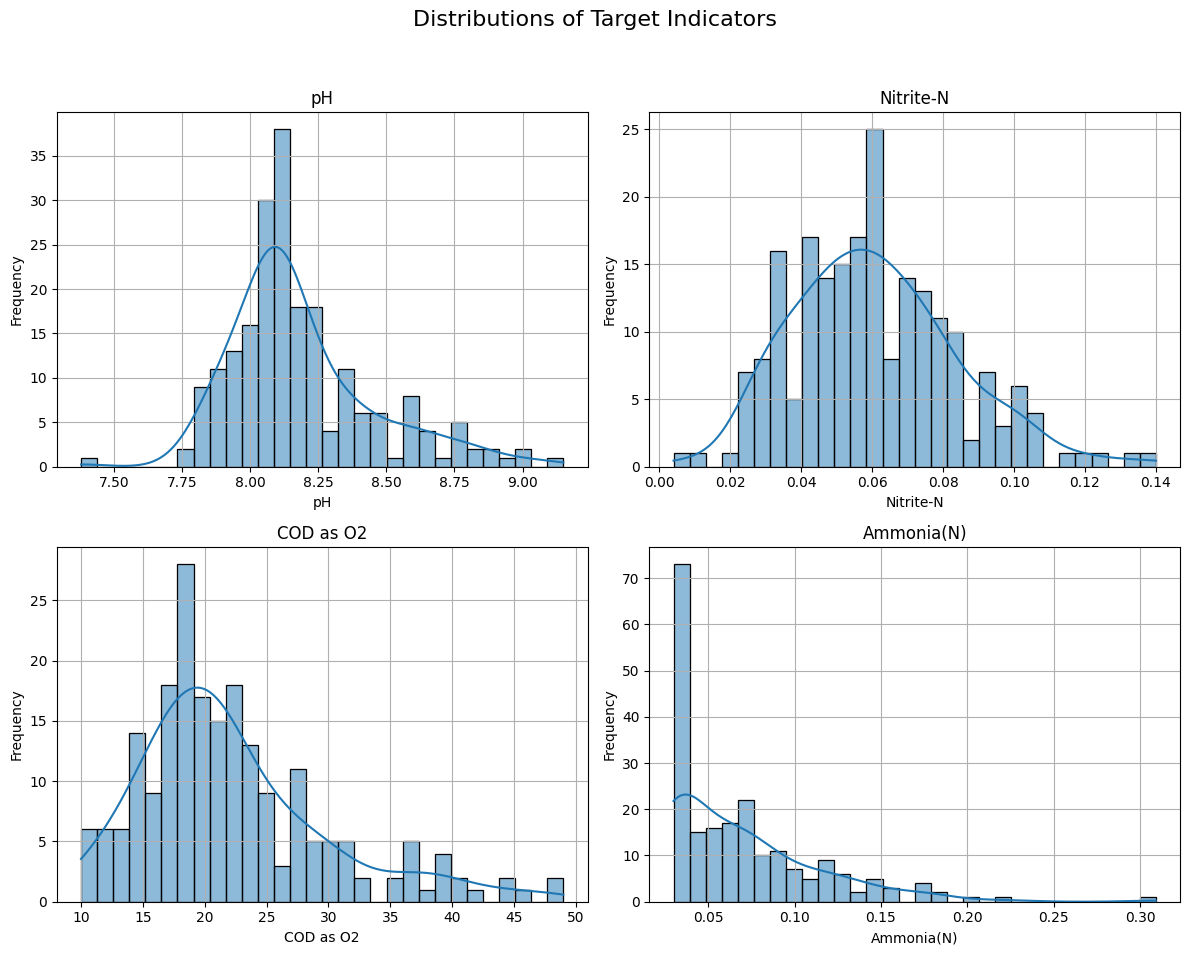

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = best_location_data.copy()
df["Date"] = pd.to_datetime(df["Date"])

target_indicators = ['pH', 'Nitrite-N', 'COD as O2', 'Ammonia(N)']

# 2x2 Boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Boxplots of Target Indicators", fontsize=16)

for ax, indicator in zip(axes.flatten(), target_indicators):
    sns.boxplot(y=df[indicator], ax=ax)
    ax.set_title(f"{indicator}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # adjust layout to fit title
plt.show()

# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[target_indicators].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Target Indicators")
plt.show()

# 2x2 Distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distributions of Target Indicators", fontsize=16)

for ax, indicator in zip(axes.flatten(), target_indicators):
    sns.histplot(df[indicator], kde=True, bins=30, ax=ax)
    ax.set_title(f"{indicator}")
    ax.set_xlabel(indicator)
    ax.set_ylabel("Frequency")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


CODE TO SEPERATE FOR STATISTICAL MODELS


In [ ]:
import pandas as pd

# Load the data (assuming it's in a CSV file)
# df = pd.read_csv("your_file.csv")

# Define the columns to extract
columns = ["Ammonia(N)", "COD as O2", "Nitrite-N", "pH"]

# Create the list of DataFrames
dfList = [pd.DataFrame({"IndicatorsName": col, "Value": df[col], "MonitoringDate": df["Date"], "Place": 1}) for col in columns]

# Print to verify
for i, sub_df in enumerate(dfList):
    print(f"DataFrame {i+1} ({columns[i]}):")
    print(sub_df.head())
    print("\n")


DataFrame 1 (Ammonia(N)):
      IndicatorsName  Value MonitoringDate  Place
23942     Ammonia(N)  0.175     2003-01-14      1
23943     Ammonia(N)  0.030     2003-05-02      1
23944     Ammonia(N)  0.030     2003-05-07      1
23945     Ammonia(N)  0.030     2003-05-19      1
23946     Ammonia(N)  0.062     2003-07-11      1


DataFrame 2 (COD as O2):
      IndicatorsName  Value MonitoringDate  Place
23942      COD as O2   20.0     2003-01-14      1
23943      COD as O2   39.0     2003-05-02      1
23944      COD as O2   48.0     2003-05-07      1
23945      COD as O2   46.0     2003-05-19      1
23946      COD as O2   27.0     2003-07-11      1


DataFrame 3 (Nitrite-N):
      IndicatorsName   Value MonitoringDate  Place
23942      Nitrite-N  0.0707     2003-01-14      1
23943      Nitrite-N  0.0850     2003-05-02      1
23944      Nitrite-N  0.0939     2003-05-07      1
23945      Nitrite-N  0.1170     2003-05-19      1
23946      Nitrite-N  0.0649     2003-07-11      1


DataFrame 4 

In [ ]:
# ARIMA specific problems, run on a different runtime
!pip uninstall -y numpy  # Remove current numpy
!pip install numpy==1.23.5  # Install a stable version
!pip install pmdarima  # Now install pmdarima

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have nump

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.5 MB/s eta 0:00:00


Processing DataFrame 1...
ARIMA model for DataFrame 1:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  168
Model:               SARIMAX(0, 0, 2)   Log Likelihood                 291.222
Date:                Wed, 23 Apr 2025   AIC                           -574.444
Time:                        04:01:45   BIC                           -561.948
Sample:                             0   HQIC                          -569.373
                                - 168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0700      0.007      9.820      0.000       0.056       0.084
ma.L1          0.3192      0.065      4.936      0.000       0.192       0.4

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 1:
  Highest RMSE: 0.087
  Overall RMSE: 0.037
  Overall MAE: 0.029


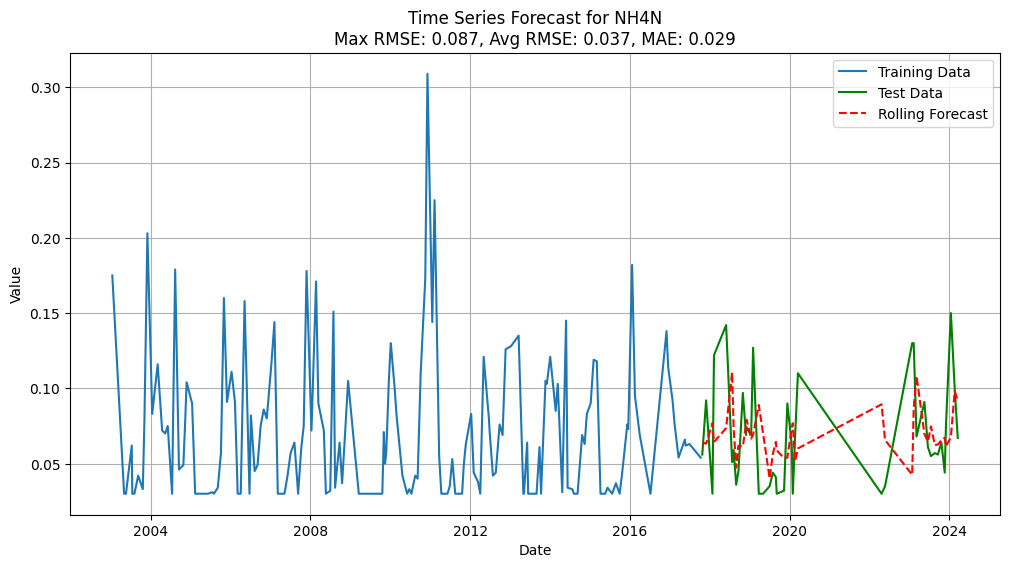

Processing DataFrame 2...
ARIMA model for DataFrame 2:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  168
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -569.941
Date:                Wed, 23 Apr 2025   AIC                           1145.882
Time:                        04:02:10   BIC                           1155.254
Sample:                             0   HQIC                          1149.685
                                - 168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.4082      1.876      8.214      0.000      11.732      19.085
ar.L1          0.3045      0.070      4.355      0.000       0.167       0.4

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 2:
  Highest RMSE: 29.686
  Overall RMSE: 8.600
  Overall MAE: 5.678


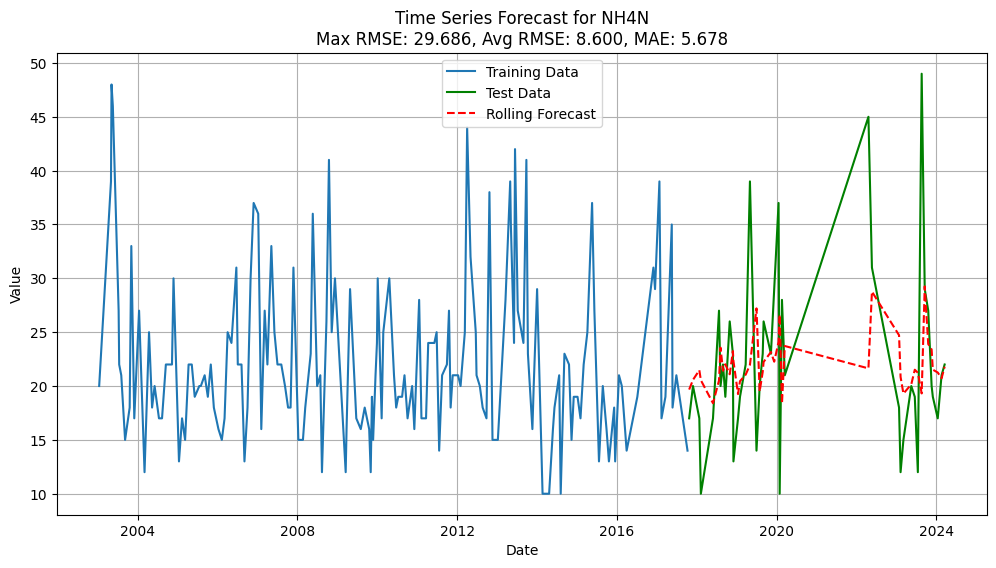

Processing DataFrame 3...
ARIMA model for DataFrame 3:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  168
Model:               SARIMAX(3, 0, 3)   Log Likelihood                 429.579
Date:                Wed, 23 Apr 2025   AIC                           -843.159
Time:                        04:02:24   BIC                           -818.167
Sample:                             0   HQIC                          -833.016
                                - 168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0321      0.012      2.709      0.007       0.009       0.055
ar.L1          1.4485      0.183      7.935      0.000       1.091       1.8

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 3:
  Highest RMSE: 0.101
  Overall RMSE: 0.030
  Overall MAE: 0.022


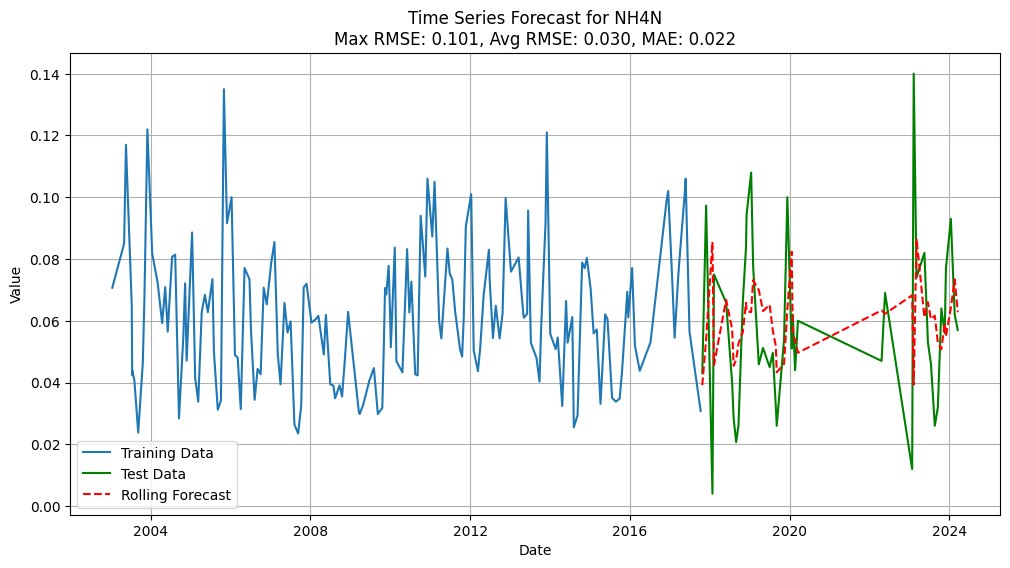

Processing DataFrame 4...
ARIMA model for DataFrame 4:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  168
Model:               SARIMAX(1, 0, 0)   Log Likelihood                   0.223
Date:                Wed, 23 Apr 2025   AIC                              5.554
Time:                        04:02:32   BIC                             14.926
Sample:                             0   HQIC                             9.357
                                - 168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3747      0.489      8.950      0.000       3.417       5.333
ar.L1          0.4672      0.058      8.054      0.000       0.354       0.5

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Metrics for DataFrame 4:
  Highest RMSE: 0.896
  Overall RMSE: 0.247
  Overall MAE: 0.164


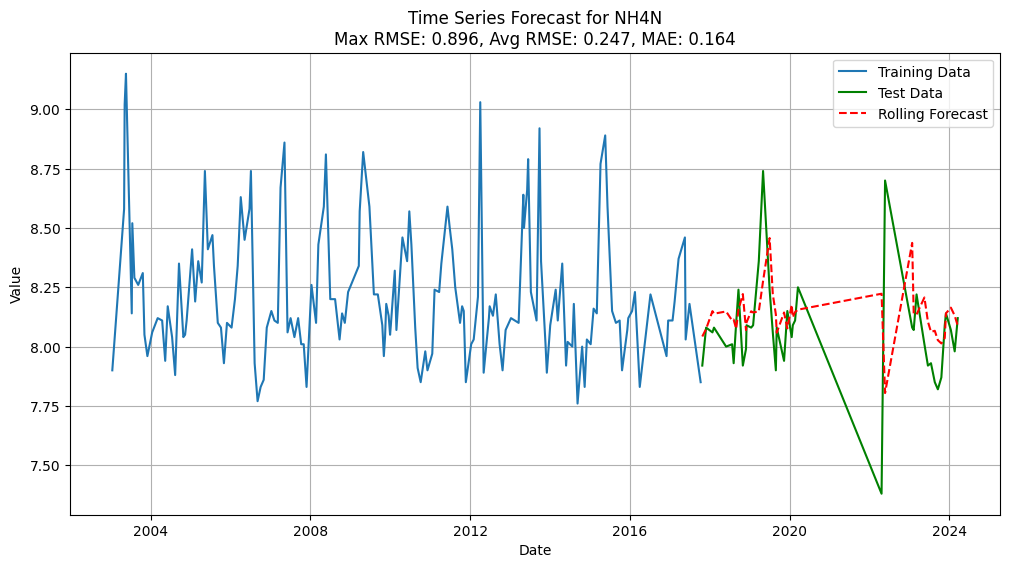

In [ ]:
import pmdarima as pm
import matplotlib.pyplot as plt
from pandas import to_datetime
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
import numpy as np

import warnings

# Suppress sklearn deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Iterate through each DataFrame in the list
for i, df2 in enumerate(dfList):

    # Train-test split (80-20)
    split_idx = int(len(df2) * 0.8)
    train = df2.iloc[:split_idx]
    test = df2.iloc[split_idx:].copy()

    # Auto ARIMA model fitting on the training data
    print(f"Processing DataFrame {i + 1}...")
    model = pm.auto_arima(train['Value'],
                          seasonal=True,  # Change to True if seasonality is expected
                          stepwise=True,
                          error_action='ignore',
                          suppress_warnings=True)

    # Print the summary of the ARIMA model
    print(f"ARIMA model for DataFrame {i + 1}:")
    print(model.summary())

    # Rolling forecast every 1 value
    step_size = 1
    forecast_values = []
    conf_int_values = []
    individual_rmse = []
    all_actual_values = []  # To store all actual values for overall MAE calculation

    for start in range(0, len(test), step_size):
        end = min(start + step_size, len(test))
        forecast, conf_int = model.predict(n_periods=(end - start), return_conf_int=True)
        forecast_values.extend(forecast)
        conf_int_values.extend(conf_int)

        # Store actual values for overall MAE calculation
        actual_values = test.iloc[start:end]['Value'].values
        all_actual_values.extend(actual_values)

        # Compute RMSE for each prediction step
        rmse_step = np.sqrt(mean_squared_error(actual_values, forecast))
        individual_rmse.append(rmse_step)

        # Update model with new observations
        model.update(actual_values)

    # Convert forecast lists to numpy arrays
    forecast_values = np.array(forecast_values)
    conf_int_values = np.array(conf_int_values)
    all_actual_values = np.array(all_actual_values)

    # Calculate highest and average RMSE across individual predictions
    max_rmse = np.max(individual_rmse)
    avg_rmse = np.mean(individual_rmse)

    # Calculate overall MAE using all predictions together
    overall_mae = mean_absolute_error(all_actual_values, forecast_values)
    overall_rmse = np.sqrt(mean_squared_error(all_actual_values, forecast_values))

    print(f"Metrics for DataFrame {i + 1}:")
    print(f"  Highest RMSE: {max_rmse:.3f}")
    print(f"  Overall RMSE: {overall_rmse:.3f}")
    print(f"  Overall MAE: {overall_mae:.3f}")

    # Plot the training data, test data, and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(train['MonitoringDate'], train['Value'], label='Training Data')
    plt.plot(test['MonitoringDate'], test['Value'], label='Test Data',color='green')
    plt.plot(test['MonitoringDate'], forecast_values,'r--', label='Rolling Forecast')

    plt.title(f'Time Series Forecast for NH4N\nMax RMSE: {max_rmse:.3f}, Avg RMSE: {overall_rmse:.3f}, MAE: {overall_mae:.3f}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()